# View the downloaded era5 data

In [2]:
import xarray as xr

file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 DATA Download\daily_accumulated\ERA5_DAILY_TP_SF_2023_01.nc"
ds = xr.open_dataset(file)


In [3]:
print(ds)


<xarray.Dataset> Size: 258MB
Dimensions:    (time: 31, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 248B 2023-01-01 2023-01-02 ... 2023-01-31
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number     int64 8B ...
Data variables:
    tp         (time, latitude, longitude) float32 129MB ...
    sf         (time, latitude, longitude) float32 129MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-17T05:18 GRIB to CDM+CF via cfgrib-0.9.1...


## Generating Map=>

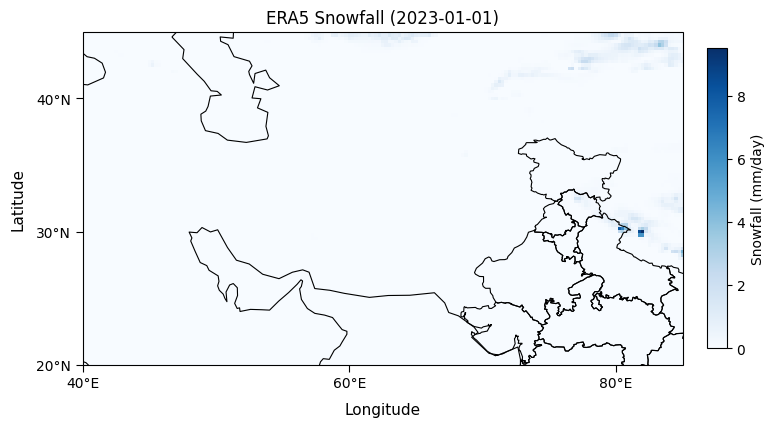

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import cartopy.io.shapereader as shpreader

# Path to your India shapefile (.shp)
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"   # <-- adjust path

reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())



# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 DATA Download\daily_accumulated\ERA5_DAILY_TP_SF_2023_01.nc"

# Lat–lon box (example: India + surroundings)
lon_min, lon_max = 40, 85
lat_min, lat_max = 20, 45

# Choose day index (0 = 1 Jan, or use .mean("time") for monthly mean)
time_selector = 0   # or: None for monthly mean

# ----------------------------
# READ DATA
# ----------------------------
ds = xr.open_dataset(nc_file)

# Subset region
ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)  # note: lat is descending
)

# Select snowfall
if time_selector is None:
    sf_plot = ds_reg["sf"].mean("time")
    title_time = "January Mean"
else:
    sf_plot = ds_reg["sf"].isel(time=time_selector)
    title_time = str(sf_plot["time"].values)[:10]

# ----------------------------
# FIGURE & AXES
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes(
    [0.08, 0.1, 0.75, 0.8],
    projection=ccrs.PlateCarree()
)

# ----------------------------
# ERA5 SNOWFALL PLOT
# ----------------------------
im = sf_plot.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",
    add_colorbar=False
)

# ----------------------------
# COASTLINES
# ----------------------------
ax.coastlines(resolution="110m", linewidth=0.8, zorder=3)

# ----------------------------
# INDIA SHAPEFILE
# ----------------------------
ax.add_geometries(
    india_geom,
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=0.8,
    zorder=4
)

# ----------------------------
# DOMAIN
# ----------------------------
ax.set_extent([lon_min, lon_max, lat_min, lat_max],
              crs=ccrs.PlateCarree())

# ----------------------------
# LAT / LON TICKS
# ----------------------------
lon_ticks = [40, 60, 80]
lat_ticks = [20, 30, 40]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol="°"))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol="°"))

ax.tick_params(axis="both", labelsize=10, length=5, width=0.8)

# ----------------------------
# LABELS & TITLE
# ----------------------------
ax.set_xlabel("Longitude", fontsize=11, labelpad=8)
ax.set_ylabel("Latitude", fontsize=11, labelpad=8)

ax.set_title(
    f"ERA5 Snowfall ({title_time})",
    fontsize=12
)

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Snowfall (mm/day)")

plt.show()


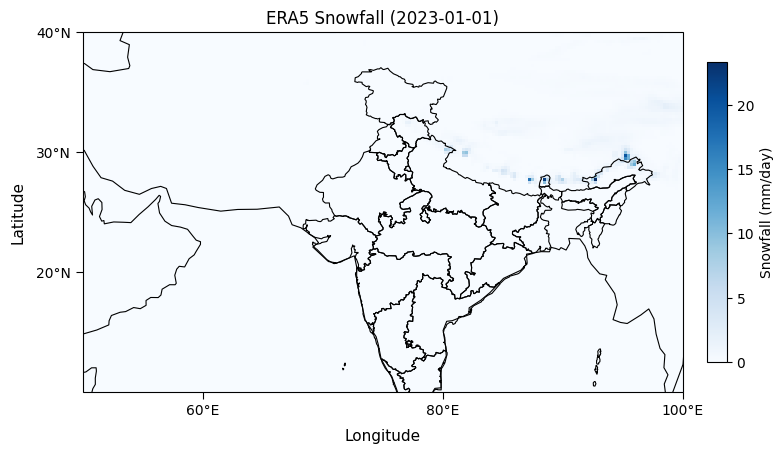

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import cartopy.io.shapereader as shpreader

# Path to your India shapefile (.shp)
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"   # <-- adjust path

reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())



# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 DATA Download\daily_accumulated\ERA5_DAILY_TP_SF_2023_01.nc"

# Lat–lon box (example: India + surroundings)
lon_min, lon_max = 50, 100
lat_min, lat_max = 10, 40

# Choose day index (0 = 1 Jan, or use .mean("time") for monthly mean)
time_selector = 0   # or: None for monthly mean

# ----------------------------
# READ DATA
# ----------------------------
ds = xr.open_dataset(nc_file)

# Subset region
ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)  # note: lat is descending
)

# Select snowfall
if time_selector is None:
    sf_plot = ds_reg["sf"].mean("time")
    title_time = "January Mean"
else:
    sf_plot = ds_reg["sf"].isel(time=time_selector)
    title_time = str(sf_plot["time"].values)[:10]

# ----------------------------
# FIGURE & AXES
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes(
    [0.08, 0.1, 0.75, 0.8],
    projection=ccrs.PlateCarree()
)

# ----------------------------
# ERA5 SNOWFALL PLOT
# ----------------------------
im = sf_plot.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",
    add_colorbar=False
)

# ----------------------------
# COASTLINES
# ----------------------------
ax.coastlines(resolution="110m", linewidth=0.8, zorder=3)

# ----------------------------
# INDIA SHAPEFILE
# ----------------------------
ax.add_geometries(
    india_geom,
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=0.8,
    zorder=4
)

# ----------------------------
# DOMAIN
# ----------------------------
ax.set_extent([lon_min, lon_max, lat_min, lat_max],
              crs=ccrs.PlateCarree())

# ----------------------------
# LAT / LON TICKS
# ----------------------------
lon_ticks = [60, 80, 100]
lat_ticks = [20, 30, 40]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol="°"))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol="°"))

ax.tick_params(axis="both", labelsize=10, length=5, width=0.8)

# ----------------------------
# LABELS & TITLE
# ----------------------------
ax.set_xlabel("Longitude", fontsize=11, labelpad=8)
ax.set_ylabel("Latitude", fontsize=11, labelpad=8)

ax.set_title(
    f"ERA5 Snowfall ({title_time})",
    fontsize=12
)

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Snowfall (mm/day)")

plt.show()


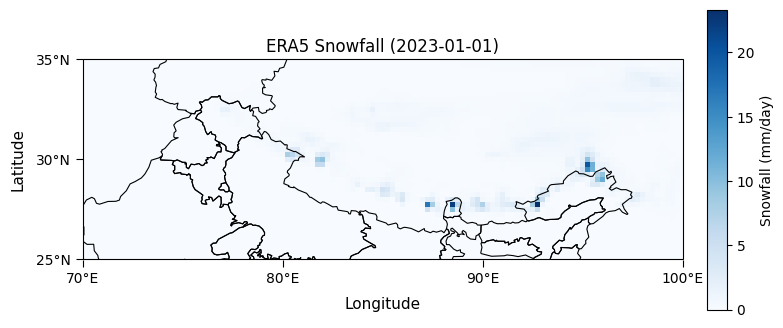

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import cartopy.io.shapereader as shpreader

# Path to your India shapefile (.shp)
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"   # <-- adjust path

reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())



# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 DATA Download\daily_accumulated\ERA5_DAILY_TP_SF_2023_01.nc"

# Lat–lon box (example: India + surroundings)
lon_min, lon_max = 70, 100
lat_min, lat_max = 25, 35

# Choose day index (0 = 1 Jan, or use .mean("time") for monthly mean)
time_selector = 0   # or: None for monthly mean

# ----------------------------
# READ DATA
# ----------------------------
ds = xr.open_dataset(nc_file)

# Subset region
ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)  # note: lat is descending
)

# Select snowfall
if time_selector is None:
    sf_plot = ds_reg["sf"].mean("time")
    title_time = "January Mean"
else:
    sf_plot = ds_reg["sf"].isel(time=time_selector)
    title_time = str(sf_plot["time"].values)[:10]

# ----------------------------
# FIGURE & AXES
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes(
    [0.08, 0.1, 0.75, 0.8],
    projection=ccrs.PlateCarree()
)

# ----------------------------
# ERA5 SNOWFALL PLOT
# ----------------------------
im = sf_plot.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Blues",
    add_colorbar=False
)

# ----------------------------
# COASTLINES
# ----------------------------
ax.coastlines(resolution="110m", linewidth=0.8, zorder=3)

# ----------------------------
# INDIA SHAPEFILE
# ----------------------------
ax.add_geometries(
    india_geom,
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=0.8,
    zorder=4
)

# ----------------------------
# DOMAIN
# ----------------------------
ax.set_extent([lon_min, lon_max, lat_min, lat_max],
              crs=ccrs.PlateCarree())

# ----------------------------
# LAT / LON TICKS
# ----------------------------
lon_ticks = [70, 80, 90, 100]
lat_ticks = [25, 30, 35]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol="°"))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol="°"))

ax.tick_params(axis="both", labelsize=10, length=5, width=0.8)

# ----------------------------
# LABELS & TITLE
# ----------------------------
ax.set_xlabel("Longitude", fontsize=11, labelpad=8)
ax.set_ylabel("Latitude", fontsize=11, labelpad=8)

ax.set_title(
    f"ERA5 Snowfall ({title_time})",
    fontsize=12
)

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Snowfall (mm/day)")

plt.show()


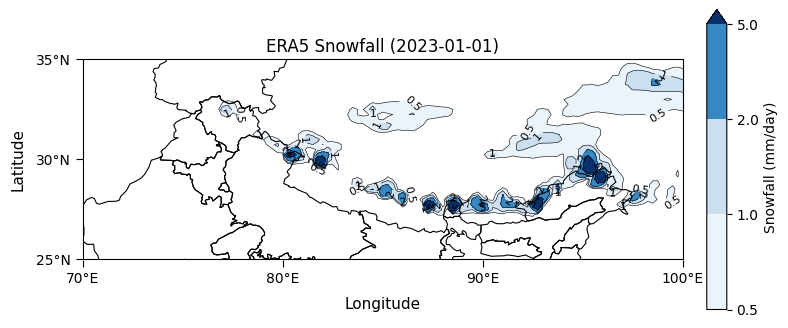

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import cartopy.io.shapereader as shpreader

# Path to your India shapefile (.shp)
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"   # <-- adjust path

reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())



# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 DATA Download\daily_accumulated\ERA5_DAILY_TP_SF_2023_01.nc"

# Lat–lon box (example: India + surroundings)
lon_min, lon_max = 70, 100
lat_min, lat_max = 25, 35

# Choose day index (0 = 1 Jan, or use .mean("time") for monthly mean)
time_selector = 0   # or: None for monthly mean

# ----------------------------
# READ DATA
# ----------------------------
ds = xr.open_dataset(nc_file)

# Subset region
ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)  # note: lat is descending
)

# Select snowfall
if time_selector is None:
    sf_plot = ds_reg["sf"].mean("time")
    title_time = "January Mean"
else:
    sf_plot = ds_reg["sf"].isel(time=time_selector)
    title_time = str(sf_plot["time"].values)[:10]

# ----------------------------
# FIGURE & AXES
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes(
    [0.08, 0.1, 0.75, 0.8],
    projection=ccrs.PlateCarree()
)

# ----------------------------
# define SNOWFALL LEVELS
# ----------------------------

import numpy as np

# Snowfall thresholds in mm/day
levels = [0.5, 1, 2, 5]

# ----------------------------
# ERA5 SNOWFALL CONTOUR PLOT
# ----------------------------
im = ax.contourf(
    sf_plot.longitude,
    sf_plot.latitude,
    sf_plot,
    levels=levels,
    cmap="Blues",
    extend="max",
    transform=ccrs.PlateCarree()
)

# Optional: draw contour lines on top
cs = ax.contour(
    sf_plot.longitude,
    sf_plot.latitude,
    sf_plot,
    levels=levels,
    colors="black",
    linewidths=0.4,
    transform=ccrs.PlateCarree()
)

ax.clabel(cs, fmt="%g", fontsize=8)


# ----------------------------
# COASTLINES
# ----------------------------
ax.coastlines(resolution="110m", linewidth=0.8, zorder=3)

# ----------------------------
# INDIA SHAPEFILE
# ----------------------------
ax.add_geometries(
    india_geom,
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=0.8,
    zorder=4
)

# ----------------------------
# DOMAIN
# ----------------------------
ax.set_extent([lon_min, lon_max, lat_min, lat_max],
              crs=ccrs.PlateCarree())

# ----------------------------
# LAT / LON TICKS
# ----------------------------
lon_ticks = [70, 80, 90, 100]
lat_ticks = [25, 30, 35]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol="°"))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol="°"))

ax.tick_params(axis="both", labelsize=10, length=5, width=0.8)

# ----------------------------
# LABELS & TITLE
# ----------------------------
ax.set_xlabel("Longitude", fontsize=11, labelpad=8)
ax.set_ylabel("Latitude", fontsize=11, labelpad=8)

ax.set_title(
    f"ERA5 Snowfall ({title_time})",
    fontsize=12
)

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Snowfall (mm/day)")

plt.show()


### Changing the contour color=>

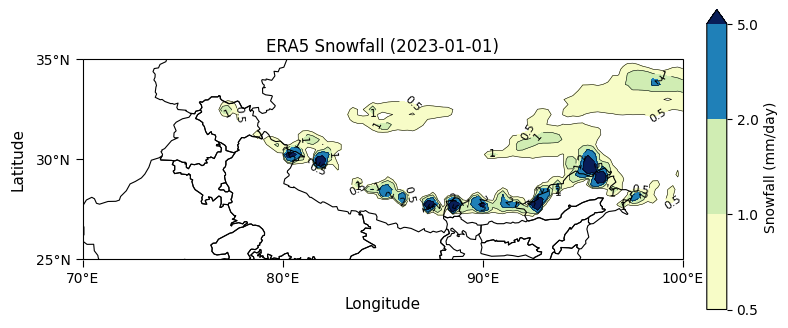

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import cartopy.io.shapereader as shpreader

# Path to your India shapefile (.shp)
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"   # <-- adjust path

reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())



# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 DATA Download\daily_accumulated\ERA5_DAILY_TP_SF_2023_01.nc"

# Lat–lon box (example: India + surroundings)
lon_min, lon_max = 70, 100
lat_min, lat_max = 25, 35

# Choose day index (0 = 1 Jan, or use .mean("time") for monthly mean)
time_selector = 0   # or: None for monthly mean

# ----------------------------
# READ DATA
# ----------------------------
ds = xr.open_dataset(nc_file)

# Subset region
ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)  # note: lat is descending
)

# Select snowfall
if time_selector is None:
    sf_plot = ds_reg["sf"].mean("time")
    title_time = "January Mean"
else:
    sf_plot = ds_reg["sf"].isel(time=time_selector)
    title_time = str(sf_plot["time"].values)[:10]

# ----------------------------
# FIGURE & AXES
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes(
    [0.08, 0.1, 0.75, 0.8],
    projection=ccrs.PlateCarree()
)

# ----------------------------
# define SNOWFALL LEVELS
# ----------------------------

import numpy as np

# Snowfall thresholds in mm/day
levels = [0.5, 1, 2, 5]

# ----------------------------
# ERA5 SNOWFALL CONTOUR PLOT
# ----------------------------
im = ax.contourf(
    sf_plot.longitude,
    sf_plot.latitude,
    sf_plot,
    levels=levels,
    cmap="YlGnBu",
    extend="max",
    transform=ccrs.PlateCarree()
)

# Optional: draw contour lines on top
cs = ax.contour(
    sf_plot.longitude,
    sf_plot.latitude,
    sf_plot,
    levels=levels,
    colors="black",
    linewidths=0.4,
    transform=ccrs.PlateCarree()
)

ax.clabel(cs, fmt="%g", fontsize=8)


# ----------------------------
# COASTLINES
# ----------------------------
ax.coastlines(resolution="110m", linewidth=0.8, zorder=3)

# ----------------------------
# INDIA SHAPEFILE
# ----------------------------
ax.add_geometries(
    india_geom,
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=0.8,
    zorder=4
)

# ----------------------------
# DOMAIN
# ----------------------------
ax.set_extent([lon_min, lon_max, lat_min, lat_max],
              crs=ccrs.PlateCarree())

# ----------------------------
# LAT / LON TICKS
# ----------------------------
lon_ticks = [70, 80, 90, 100]
lat_ticks = [25, 30, 35]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol="°"))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol="°"))

ax.tick_params(axis="both", labelsize=10, length=5, width=0.8)

# ----------------------------
# LABELS & TITLE
# ----------------------------
ax.set_xlabel("Longitude", fontsize=11, labelpad=8)
ax.set_ylabel("Latitude", fontsize=11, labelpad=8)

ax.set_title(
    f"ERA5 Snowfall ({title_time})",
    fontsize=12
)

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Snowfall (mm/day)")

plt.show()


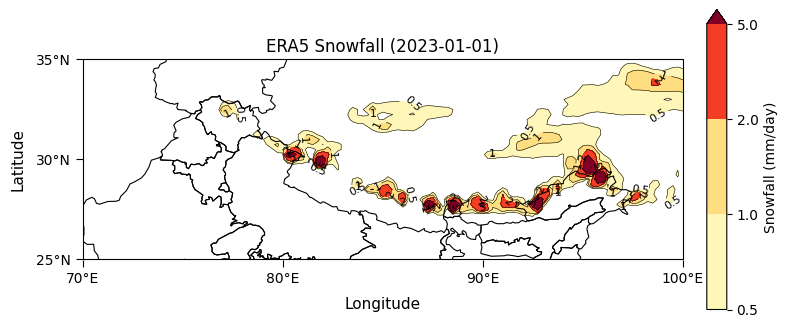

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import cartopy.io.shapereader as shpreader

# Path to your India shapefile (.shp)
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"   # <-- adjust path

reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())



# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 DATA Download\daily_accumulated\ERA5_DAILY_TP_SF_2023_01.nc"

# Lat–lon box (example: India + surroundings)
lon_min, lon_max = 70, 100
lat_min, lat_max = 25, 35

# Choose day index (0 = 1 Jan, or use .mean("time") for monthly mean)
time_selector = 0   # or: None for monthly mean

# ----------------------------
# READ DATA
# ----------------------------
ds = xr.open_dataset(nc_file)

# Subset region
ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)  # note: lat is descending
)

# Select snowfall
if time_selector is None:
    sf_plot = ds_reg["sf"].mean("time")
    title_time = "January Mean"
else:
    sf_plot = ds_reg["sf"].isel(time=time_selector)
    title_time = str(sf_plot["time"].values)[:10]

# ----------------------------
# FIGURE & AXES
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes(
    [0.08, 0.1, 0.75, 0.8],
    projection=ccrs.PlateCarree()
)

# ----------------------------
# define SNOWFALL LEVELS
# ----------------------------

import numpy as np

# Snowfall thresholds in mm/day
levels = [0.5, 1, 2, 5]

# ----------------------------
# ERA5 SNOWFALL CONTOUR PLOT
# ----------------------------
im = ax.contourf(
    sf_plot.longitude,
    sf_plot.latitude,
    sf_plot,
    levels=levels,
    cmap="YlOrRd",
    extend="max",
    transform=ccrs.PlateCarree()
)

# Optional: draw contour lines on top
cs = ax.contour(
    sf_plot.longitude,
    sf_plot.latitude,
    sf_plot,
    levels=levels,
    colors="black",
    linewidths=0.4,
    transform=ccrs.PlateCarree()
)

ax.clabel(cs, fmt="%g", fontsize=8)


# ----------------------------
# COASTLINES
# ----------------------------
ax.coastlines(resolution="110m", linewidth=0.8, zorder=3)

# ----------------------------
# INDIA SHAPEFILE
# ----------------------------
ax.add_geometries(
    india_geom,
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=0.8,
    zorder=4
)

# ----------------------------
# DOMAIN
# ----------------------------
ax.set_extent([lon_min, lon_max, lat_min, lat_max],
              crs=ccrs.PlateCarree())

# ----------------------------
# LAT / LON TICKS
# ----------------------------
lon_ticks = [70, 80, 90, 100]
lat_ticks = [25, 30, 35]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol="°"))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol="°"))

ax.tick_params(axis="both", labelsize=10, length=5, width=0.8)

# ----------------------------
# LABELS & TITLE
# ----------------------------
ax.set_xlabel("Longitude", fontsize=11, labelpad=8)
ax.set_ylabel("Latitude", fontsize=11, labelpad=8)

ax.set_title(
    f"ERA5 Snowfall ({title_time})",
    fontsize=12
)

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Snowfall (mm/day)")

plt.show()


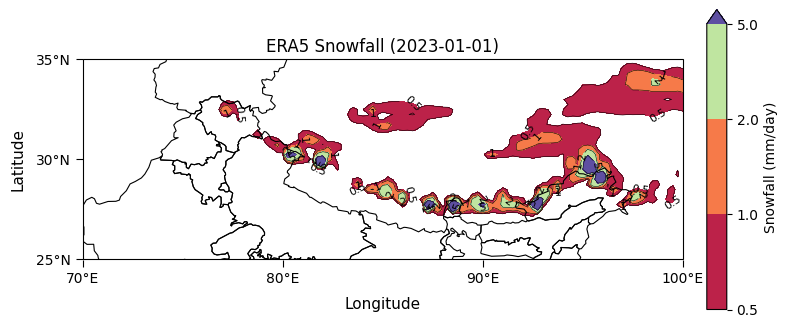

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import cartopy.io.shapereader as shpreader

# Path to your India shapefile (.shp)
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"   # <-- adjust path

reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())



# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 DATA Download\daily_accumulated\ERA5_DAILY_TP_SF_2023_01.nc"

# Lat–lon box (example: India + surroundings)
lon_min, lon_max = 70, 100
lat_min, lat_max = 25, 35

# Choose day index (0 = 1 Jan, or use .mean("time") for monthly mean)
time_selector = 0   # or: None for monthly mean

# ----------------------------
# READ DATA
# ----------------------------
ds = xr.open_dataset(nc_file)

# Subset region
ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)  # note: lat is descending
)

# Select snowfall
if time_selector is None:
    sf_plot = ds_reg["sf"].mean("time")
    title_time = "January Mean"
else:
    sf_plot = ds_reg["sf"].isel(time=time_selector)
    title_time = str(sf_plot["time"].values)[:10]

# ----------------------------
# FIGURE & AXES
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes(
    [0.08, 0.1, 0.75, 0.8],
    projection=ccrs.PlateCarree()
)

# ----------------------------
# define SNOWFALL LEVELS
# ----------------------------

import numpy as np

# Snowfall thresholds in mm/day
levels = [0.5, 1, 2, 5]

# ----------------------------
# ERA5 SNOWFALL CONTOUR PLOT
# ----------------------------
im = ax.contourf(
    sf_plot.longitude,
    sf_plot.latitude,
    sf_plot,
    levels=levels,
    cmap="Spectral",
    extend="max",
    transform=ccrs.PlateCarree()
)

# Optional: draw contour lines on top
cs = ax.contour(
    sf_plot.longitude,
    sf_plot.latitude,
    sf_plot,
    levels=levels,
    colors="black",
    linewidths=0.4,
    transform=ccrs.PlateCarree()
)

ax.clabel(cs, fmt="%g", fontsize=8)


# ----------------------------
# COASTLINES
# ----------------------------
ax.coastlines(resolution="110m", linewidth=0.8, zorder=3)

# ----------------------------
# INDIA SHAPEFILE
# ----------------------------
ax.add_geometries(
    india_geom,
    crs=ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="black",
    linewidth=0.8,
    zorder=4
)

# ----------------------------
# DOMAIN
# ----------------------------
ax.set_extent([lon_min, lon_max, lat_min, lat_max],
              crs=ccrs.PlateCarree())

# ----------------------------
# LAT / LON TICKS
# ----------------------------
lon_ticks = [70, 80, 90, 100]
lat_ticks = [25, 30, 35]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol="°"))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol="°"))

ax.tick_params(axis="both", labelsize=10, length=5, width=0.8)

# ----------------------------
# LABELS & TITLE
# ----------------------------
ax.set_xlabel("Longitude", fontsize=11, labelpad=8)
ax.set_ylabel("Latitude", fontsize=11, labelpad=8)

ax.set_title(
    f"ERA5 Snowfall ({title_time})",
    fontsize=12
)

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Snowfall (mm/day)")

plt.show()
